In [1]:
import pandas as pd
from scipy.stats import norm

# Данные
xs = [5, 6.4, 7, 5.5, 8, 4.9, 6.2]

# Оценка параметров нормального распределения методом максимального правдоподобия
mu_mle, sigma_mle = norm.fit(xs)

mu_mle, sigma_mle

(6.142857142857143, 1.0362806333326933)

In [2]:
import numpy as np

func = 1

sigma = 1
mean = 2

for elem in xs:
    func *= 1 / (sigma * np.sqrt(2 * np.pi)) * np.e ** (-(elem - mean) ** 2 / (2 * sigma ** 2))
func

3.057409994039068e-31

In [3]:
from sympy import symbols, diff

# Определяем переменные
sigma, mu = symbols('sigma mu')

# Пример функции

for elem in xs:
    func *= 1 / (sigma * np.sqrt(2 * np.pi)) * np.e ** (-(elem - mu) ** 2 / (2 * sigma ** 2))

# Частные производные
f_prime_x = diff(func, sigma)  # по x
f_prime_y = diff(func, mu)  # по y
print(f_prime_x, f_prime_y)  # Вывод: 2*x + 3*y, 2*y + 3*x

-3.44208968318071e-33/(2.71828182845905**(12.005*(1 - 0.204081632653061*mu)**2/sigma**2)*2.71828182845905**(15.125*(1 - 0.181818181818182*mu)**2/sigma**2)*2.71828182845905**(19.22*(1 - 0.161290322580645*mu)**2/sigma**2)*2.71828182845905**(20.48*(1 - 0.15625*mu)**2/sigma**2)*2.71828182845905**((5 - mu)**2/(2*sigma**2))*2.71828182845905**((7 - mu)**2/(2*sigma**2))*2.71828182845905**((8 - mu)**2/(2*sigma**2))*sigma**8) + 1.18063676133099e-32*(1 - 0.204081632653061*mu)**2/(2.71828182845905**(12.005*(1 - 0.204081632653061*mu)**2/sigma**2)*2.71828182845905**(15.125*(1 - 0.181818181818182*mu)**2/sigma**2)*2.71828182845905**(19.22*(1 - 0.161290322580645*mu)**2/sigma**2)*2.71828182845905**(20.48*(1 - 0.15625*mu)**2/sigma**2)*2.71828182845905**((5 - mu)**2/(2*sigma**2))*2.71828182845905**((7 - mu)**2/(2*sigma**2))*2.71828182845905**((8 - mu)**2/(2*sigma**2))*sigma**10) + 1.48747447023167e-32*(1 - 0.181818181818182*mu)**2/(2.71828182845905**(12.005*(1 - 0.204081632653061*mu)**2/sigma**2)*2.718281

<Axes: xlabel='MedInc', ylabel='Count'>

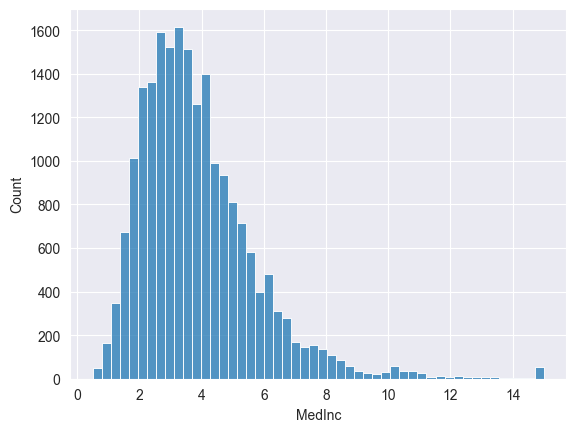

In [4]:
from sklearn.datasets import fetch_california_housing
import seaborn as sns

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1]
sns.histplot(df['MedInc'], bins=50)

In [5]:
from scipy.stats import gamma


def calc_l(arr):
    a, scale = arr[0], arr[1]
    L = np.sum(gamma(a=a, scale=scale, loc=0).logpdf(df.MedInc))

    return -L


calc_l([1, 2])

54251.88255675727

In [6]:
from scipy.optimize import minimize

solution = minimize(fun=calc_l, x0=np.array([1, 2]), method='L-BFGS-B')
solution

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 39616.8933401287
        x: [ 4.749e+00  8.150e-01]
      nit: 14
      jac: [ 5.093e-03  2.692e-02]
     nfev: 54
     njev: 18
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

In [7]:
solution.x

array([4.74906248, 0.81503914])

In [8]:
gamma(a=solution.x[0], scale=solution.x[1], loc=0).pdf(df.MedInc)

array([0.01648874, 0.01679608, 0.03653176, ..., 0.14480466, 0.16766169,
       0.22262668])

<Axes: xlabel='MedInc', ylabel='Density'>

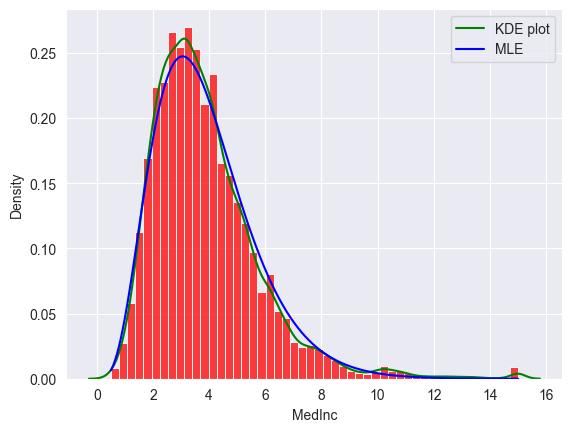

In [9]:
sns.histplot(data=df['MedInc'],
             bins=50,
             stat='density',
             kde=False,
             color='r',
             zorder=1)

sns.kdeplot(data=df['MedInc'],
            color='green',
            zorder=2,
            label='KDE plot')

x = np.linspace(df.MedInc.min(), df.MedInc.max(), 10000)
sns.lineplot(x=x,
             y=gamma(a=solution.x[0], scale=solution.x[1], loc=0).pdf(x),
             color='blue',
             zorder=3,
             label='MLE')

In [10]:
xs = [0, 1.1, 1.4, 1.8, 2.5, 5.5, 7]


In [11]:
def dens_func1(xs, h, t):
    res = []

    for id1, elem1 in enumerate(sorted(xs)):
        k = 0
        for id2, elem2 in enumerate(sorted(xs)):

            if id1 == id2:
                continue

            if abs(elem1 - elem2) / h < t:
                k += 1

        res.append(k * 1 / (len(xs) * h))

    return res

In [12]:
def dens_func2(xs):
    res = []

    for id1, elem1 in enumerate(sorted(xs)):
        k = 0
        for id2, elem2 in enumerate(sorted(xs)):

            if id1 == id2:
                continue

            if abs(elem1 - elem2) <= 1:
                k += 1 - abs(elem1 - elem2)

        res.append(k * 1 / (len(xs) * 1))

    return res

<Axes: ylabel='Density'>

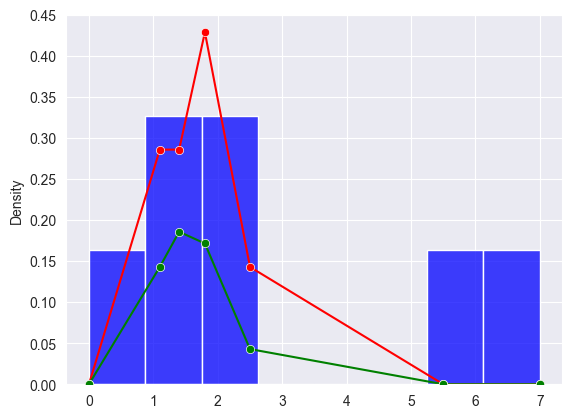

In [27]:
sns.histplot(data=xs, stat='density', color='blue', bins=8, zorder=1)

sns.lineplot(x=xs, y=dens_func1(xs, 1, 1), color='red', zorder=2)
sns.scatterplot(x=xs, y=dens_func1(xs, 1, 1), color='red', zorder=3)

sns.lineplot(x=xs, y=dens_func2(xs), color='green', zorder=2)
sns.scatterplot(x=xs, y=dens_func2(xs), color='green', zorder=3)

In [14]:
test_xs = xs.copy()
test_xs.append(2.0)
dens_func2(test_xs)

[0.0, 0.13750000000000004, 0.2125, 0.25, 0.225, 0.1, 0.0, 0.0]

In [30]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='linear', bandwidth=0.5)
kde.fit(pd.DataFrame(df['MedInc']))
res = kde.score_samples(pd.DataFrame(df['MedInc']))

<Axes: xlabel='MedInc', ylabel='Density'>

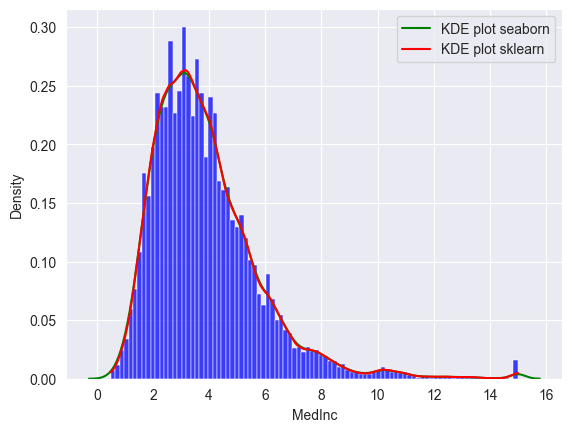

In [31]:
sns.histplot(data=df['MedInc'], stat='density', color='blue', zorder=1)

sns.kdeplot(data=df['MedInc'],
            color='green',
            zorder=2,
            label='KDE plot seaborn')

sns.lineplot(x=df['MedInc'],
             y=np.exp(res),
             color='red',
             zorder=3,
             label='KDE plot sklearn')

In [38]:
np.exp(kde.score_samples([[6]]))

C:\Users\merku\.virtualenvs\MachineLearning-x7kuzlXN\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


array([0.07392297])

In [70]:
x_data = np.linspace(df['MedInc'].min() - 0.3, df['MedInc'].max() + 0.3, 100000)
res1 = kde.score_samples(X=pd.DataFrame(x_data))

s = 0
for id in range(len(x_data) - 1):
    s += (x_data[id + 1] - x_data[id]) * np.exp(res1[id])
s

C:\Users\merku\.virtualenvs\MachineLearning-x7kuzlXN\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


0.9997261100150863

<Axes: xlabel='MedInc', ylabel='Density'>

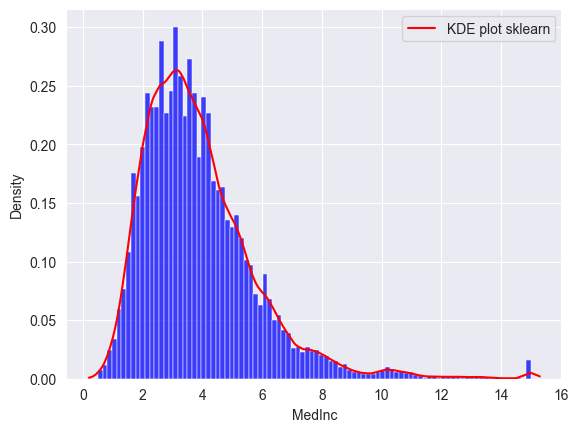

In [64]:
sns.histplot(data=df['MedInc'], stat='density', color='blue', zorder=1)

sns.lineplot(x=x_data,
             y=np.exp(res1),
             color='red',
             zorder=3,
             label='KDE plot sklearn')